In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

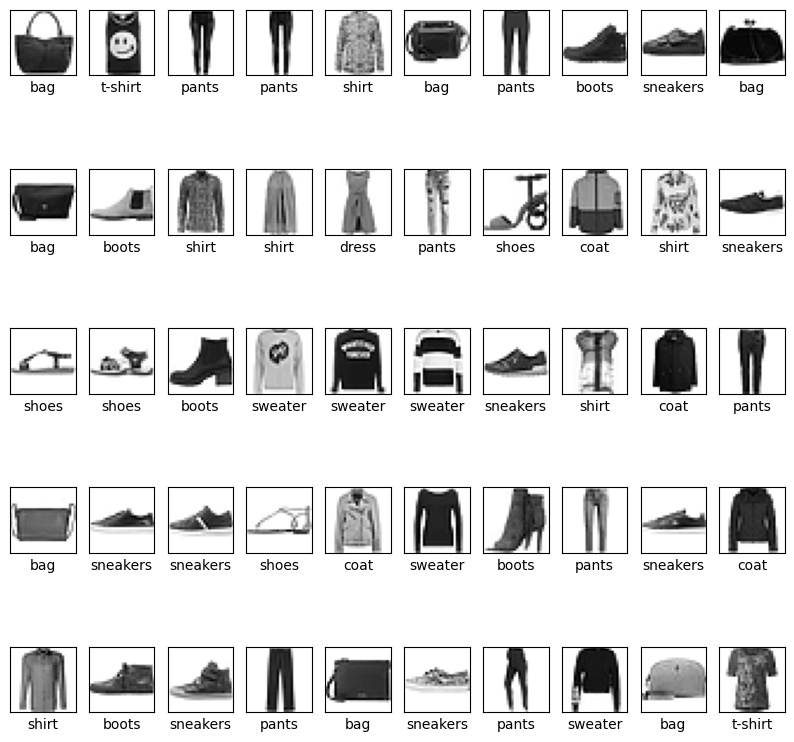

In [4]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']
plt.figure(figsize=(10, 10))

for i in range(100, 150):
    plt.subplot(5, 10, i - 100 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

plt.show()

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
prec = model.evaluate(test_images, test_labels)[1]
print(f'Test precision: {prec}')
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
labels = np.argmax(test_labels, axis=1)
true_labels = [classes[label] for label in labels]
predicted_labels = [classes[label] for label in predicted_labels]
cf_rep = classification_report(true_labels, predicted_labels, target_names=classes)
print("Метрики якості для кожного класу:\n", cf_rep)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1258 - loss: 2.3050
Test precision: 0.12049999833106995
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Метрики якості для кожного класу:
               precision    recall  f1-score   support

     t-shirt       0.06      0.01      0.01      1000
       pants       0.00      0.00      0.00      1000
     sweater       0.00      0.00      0.00      1000
       dress       0.00      0.00      0.00      1000
        coat       0.00      0.00      0.00      1000
       shoes       0.00      0.00      0.00      1000
       shirt       0.12      0.32      0.18      1000
    sneakers       0.00      0.00      0.00      1000
         bag       0.12      0.87      0.21      1000
       boots       0.13      0.00      0.01      1000

    accuracy                           0.12     10000
   macro avg       0.04      0.12      0.04     10000
weighted avg       0.04      0.12      0.04     10000



In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7497 - loss: 0.6854 - val_accuracy: 0.8546 - val_loss: 0.3996
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8737 - loss: 0.3447 - val_accuracy: 0.8803 - val_loss: 0.3358
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.8932 - loss: 0.2893 - val_accuracy: 0.8935 - val_loss: 0.2990
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9045 - loss: 0.2564 - val_accuracy: 0.9002 - val_loss: 0.2777
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9160 - loss: 0.2235 - val_accuracy: 0.9003 - val_loss: 0.2767
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9253 - loss: 0.2010 - val_accuracy: 0.9073 - val_loss: 0.2670
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9305 - loss: 0.1888 - val_accuracy: 0.9037 - val_loss: 0.2680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9384 -

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9043 - loss: 0.3107
Test accuracy: 0.9078999757766724


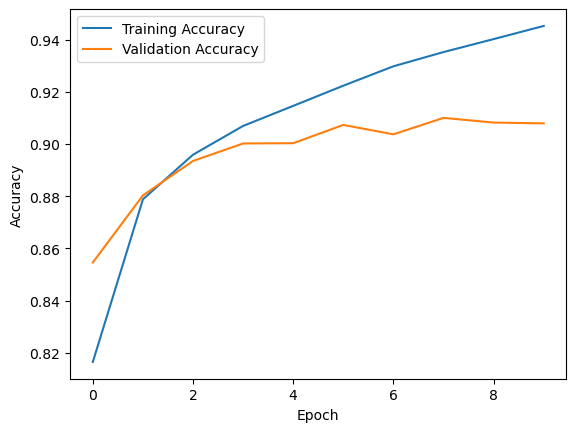

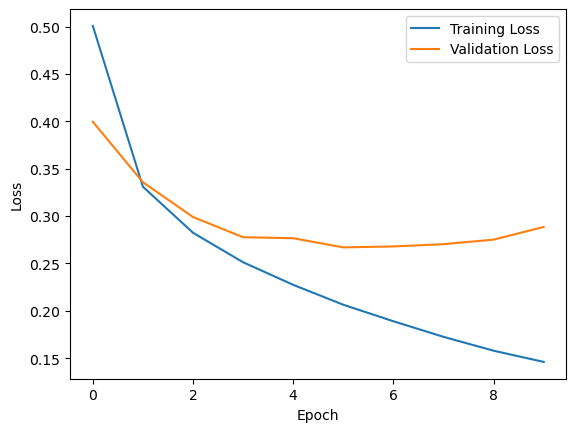

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()